# Fine-tuning your model
Having trained your model, your next task is to evaluate its performance. What metrics can you use to gauge how good your model is? So far, you have used accuracy for classification and R-squared for regression. In this chapter, you will learn about some of the other metrics available in scikit-learn that will allow you to assess your model's performance in a more nuanced manner. You will then learn to optimize both your classification as well as regression models using hyperparameter tuning.

# 1. How good is your model?
## 1.1 Metrics for classification
In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

You may have noticed in the video that the classification report consisted of three rows, and an additional _support_ column. The _support_ gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The _precision_, _recall_, and _f1-score_ columns, then, gave the respective metrics for that particular class.

Here, you'll work with the [PIMA Indians](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of `0` indicates that the patient does _not_ have diabetes, while a value of `1` indicates that the patient _does_ have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

The dataset has been loaded into a DataFrame `df` and the feature and target variable arrays `X` and `y` have been created for you. In addition, `sklearn.model_selection.train_test_split` and `sklearn.neighbors.KNeighborsClassifier` have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('_datasets/diabetes.csv')

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))
y = df['diabetes']
X = df.drop('diabetes', axis=1)

### Instructions:
* Import `classification_report` and `confusion_matrix` from `sklearn.metrics`.
* Create training and testing sets with 40% of the data used for testing. Use a random state of `42`.
* Instantiate a k-NN classifier with `6` neighbors, fit it to the training data, and predict the labels of the test set.
* Compute and print the confusion matrix and classification report using the `confusion_matrix()` and `classification_report()` functions.

In [2]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

[[176  30]
 [ 52  50]]


In [3]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       206
           1       0.62      0.49      0.55       102

   micro avg       0.73      0.73      0.73       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

# 2. Logistic regression and the ROC curve
## 2.1 Building a logistic regression model
Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

The feature and target variable arrays `X` and `y` have been pre-loaded, and `train_test_split` has been imported for from `sklearn.model_selection` the same as in section 1.

### Instructions:
* Import:
    * `LogisticRegression` from `sklearn.linear_model`.
    * `confusion_matrix` and `classification_report` from `sklearn.metrics`.
* Create training and test sets with 40% (or `0.4`) of the data used for testing. Use a random state of `42`. This has been done for you.
* Instantiate a `LogisticRegression` classifier called `logreg`.
* Fit the classifier to the training data and predict the labels of the test set.
* Compute and print the confusion matrix and classification report. This has been done for you, so hit 'Submit Answer' to see how logistic regression compares to k-NN!

In [4]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

[[176  30]
 [ 35  67]]


In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.69      0.66      0.67       102

   micro avg       0.79      0.79      0.79       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.79      0.79      0.79       308



You now know how to use logistic regression for binary classification - great work! Logistic regression is used in a variety of machine learning applications and will become a vital part of your data science toolbox.

## 2.2 Plotting an ROC curve
Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a `.predict_proba()` method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the `.predict_proba()` method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as `logreg`.

### Instructions:
* Import `roc_curve` from `sklearn.metrics`.
* Using the `logreg` classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set `X_test`. Save the result as `y_pred_prob`.
* Use the `roc_curve()` function with `y_test` and `y_pred_prob` and unpack the result into the variables `fpr`, `tpr`, and `thresholds`.
* Plot the ROC curve with `fpr` on the x-axis and `tpr` on the y-axis.

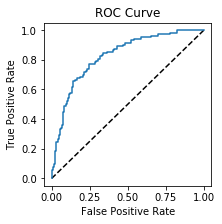

In [6]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(3, 3), dpi=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

This ROC curve provides a nice visual way to assess your classifier's performance.

## 2.3 Precision-recall Curve
When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

$ Precision = \frac{TP}{TP+FP} $

$ Recall = \frac{TP}{TP+FN} $

On the right, a precision-recall curve has been generated for the diabetes dataset. The classification report and confusion matrix are displayed in the IPython Shell.

Study the precision-recall curve and then consider the statements given below. Choose the one statement that is __not__ true. Note that here, the class is positive (1) if the individual _has_ diabetes.

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.69      0.66      0.67       102

   micro avg       0.79      0.79      0.79       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.79      0.79      0.79       308

[[176  30]
 [ 35  67]]


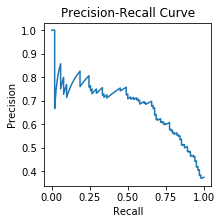

In [7]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

from sklearn.metrics import precision_recall_curve

y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(3, 3), dpi=None)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# plt.legend(loc='best')
plt.show()

### Possible Answers
1. A recall of 1 corresponds to a classifier with a low threshold in which _all_ females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did _not_ have diabetes.
2. Precision is undefined for a classifier which makes _no_ positive predictions, that is, classifies _everyone_ as _not_ having diabetes.
3. When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.
4. Precision and recall take _true negatives_ into consideration.

__Answer__: True negatives do not appear at all in the definitions of precision and recall (4).

# 3. Area under the ROC curve
## 3.1 AUC computation
Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate AUC scores using the `roc_auc_score()` function from `sklearn.metrics` as well as by performing cross-validation on the diabetes dataset.

`X` and `y`, along with training and test sets `X_train`, `X_test`, `y_train`, `y_test`, have been pre-loaded for you, and a logistic regression classifier `logreg` has been fit to the training data.

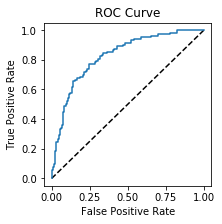

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('_datasets/diabetes.csv')
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))

y = df['diabetes']
X = df.drop('diabetes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

from sklearn.metrics import roc_curve
# Compute predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(3, 3), dpi=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Instructions:
* Import `roc_auc_score` from `sklearn.metrics` and `cross_val_score` from `sklearn.model_selection`.
* Using the `logreg` classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set `X_test`. Save the result as `y_pred_prob`.
* Compute the AUC score using the `roc_auc_score()` function, the test set labels `y_test`, and the predicted probabilities `y_pred_prob`.
* Compute the AUC scores by performing 5-fold cross-validation. Use the `cross_val_score()` function and specify the `scoring` parameter to be `'roc_auc'`.

In [9]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8254806777079765
AUC scores computed using 5-fold cross-validation: [0.80185185 0.8062963  0.81481481 0.86245283 0.8554717 ]


You now have a number of different methods you can use to evaluate your model's performance.

# 4. Hyperparameter tuning
## 4.1 Hyperparameter tuning with GridSearchCV
Hugo demonstrated how to tune the n_neighbors parameter of the `KNeighborsClassifier()` using `GridSearchCV` on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: $C$. $C$ controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large $C$ can lead to an overfit model, while a small $C$ can lead to an _underfit_ model.

The hyperparameter space for $C$ has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal $C$ in this hyperparameter space. The feature array is available as `X` and target variable array is available as `y`.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!

### Instructions:
* Import `LogisticRegression` from `sklearn.linear_model` and `GridSearchCV` from `sklearn.model_selection`.
* Setup the hyperparameter grid by using `c_space` as the grid of values to tune $C$ over.
* Instantiate a logistic regression classifier called `logreg`.
* Use `GridSearchCV` with 5-fold cross-validation to tune $C$:
    * Inside `GridSearchCV()`, specify the classifier, parameter grid, and number of folds to use.
    * Use the `.fit()` method on the `GridSearchCV` object to fit it to the data `X` and `y`.
* Print the best parameter and best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_` attributes of `logreg_cv`.

In [10]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}


In [11]:
print("Best score is {}".format(logreg_cv.best_score_))

Best score is 0.7708333333333334


It looks like a 'C' of 3.727 results in the best performance.

## 4.2 Hyperparameter tuning with RandomizedSearchCV
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use `RandomizedSearchCV`, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using `RandomizedSearchCV` in this exercise and see how this works.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have `.fit()` and `.predict()` methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as `max_features`, `max_depth`, and `min_samples_leaf`: This makes it an ideal use case for `RandomizedSearchCV`.

As before, the feature array `X` and target variable array `y` of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use `RandomizedSearchCV` to find the optimal hyperparameters. Go for it!

### Instructions:
* Import `DecisionTreeClassifier` from `sklearn.tree` and `RandomizedSearchCV` from `sklearn.model_selection`.
* Specify the parameters and distributions to sample from. This has been done for you.
* Instantiate a `DecisionTreeClassifier`.
* Use `RandomizedSearchCV` with 5-fold cross-validation to tune the hyperparameters:
    * Inside `RandomizedSearchCV()`, specify the classifier, parameter distribution, and number of folds to use.
    * Use the `.fit()` method on the `RandomizedSearchCV` object to fit it to the data `X` and `y`.
* Print the best parameter and best score obtained from `RandomizedSearchCV` by accessing the `best_params_` and `best_score_` attributes of `tree_cv`.

In [12]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 5}
Best score is 0.7291666666666666


You'll see a lot more of decision trees and `RandomizedSearchCV` as you continue your machine learning journey. Note that `RandomizedSearchCV` will never outperform `GridSearchCV`. Instead, it is valuable because it saves on computation time.

# 5. Hold-out set for final evaluation
## 5.1 Hold-out set reasoning
For which of the following reasons would you want to use a hold-out set for the very end?

Possible Answers:
1. You want to maximize the amount of training data used.
2. You want to be absolutely certain about your model's ability to generalize to unseen data.
3. You want to tune the hyperparameters of your model.

__Answer__: The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before. (2)

## 5.2 Hold-out set in practice I: Classification
You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as `X` and `y`.

In addition to $C$, logistic regression has a `'penalty'` hyperparameter which specifies whether to use `'l1'` or `'l2'` regularization. Your job in this exercise is to create a hold-out set, tune the `'C'` and `'penalty'` hyperparameters of a logistic regression classifier using `GridSearchCV` on the training set.

### Instructions:
* Create the hyperparameter grid:
    * Use the array `c_space` as the grid of values for `'C'`.
    * For `'penalty'`, specify a list consisting of `'l1'` and `'l2'`.
* Instantiate a logistic regression classifier.
* Create training and test sets. Use a `test_size` of `0.4` and `random_state` of `42`. In practice, the test set here will function as the hold-out set.
* Tune the hyperparameters on the training set using `GridSearchCV` with 5-folds. This involves first instantiating the `GridSearchCV` object with the correct parameters and then fitting it to the training data.
* Print the best parameter and best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_` attributes of `logreg_cv`.

In [13]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, iid=True)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7652173913043478


## 5.3 Hold-out set in practice II: Regression
Remember lasso and ridge regression from the previous chapter? Lasso used the $L1$ penalty to regularize, while ridge used the $L2$ penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the $L1$ and $L2$ penalties:

$a \bullet L1 + b \bullet L2$

In scikit-learn, this term is represented by the `'l1_ratio'` parameter: An `'l1_ratio'` of `1` corresponds to an $L1$ penalty, and anything lower is a combination of $L1$ and $L2$.

In this exercise, you will `GridSearchCV` to tune the `'l1_ratio'` of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [14]:
df = pd.read_csv('_datasets/gapminder-clean.csv')

y = df['life'].values
X = df.drop('life', axis=1).values

### Instructions:
* Import the following modules:
    * `ElasticNet` from `sklearn.linear_model`.
    * `mean_squared_error` from `sklearn.metrics`.
    * `GridSearchCV` and `train_test_split` from `sklearn.model_selection`.
* Create training and test sets, with $40\%$ of the data used for the test set. Use a random state of `42`.
* Specify the hyperparameter grid for `'l1_ratio'` using `l1_space` as the grid of values to search over.
* Instantiate the `ElasticNet` regressor.
* Use `GridSearchCV` with 5-fold cross-validation to tune `'l1_ratio'` on the training data `X_train` and `y_train`. This involves first instantiating the `GridSearchCV` object with the correct parameters and then fitting it to the training data.
* Predict on the test set and compute the $R^2$ and mean squared error.

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460284
Tuned ElasticNet MSE: 10.057914133398437


Now that you understand how to fine-tune your models, it's time to learn about preprocessing techniques and how to piece together all the different stages of the machine learning process into a pipeline!